In [113]:
import warnings
warnings.filterwarnings("ignore")

In [124]:
"""
Date: 2021-12-21
Author: Carlos R. B. Azevedo
GitHub: https://github.com/crbazevedo
MIT License

The code generates a synthetic dataset of dimension 50, where the labels are generated using
a linear function with additive noise of randomly selected features. The dataset is split into
training and test sets, and 100 logistic regression models with L1 regularization are fit to the
training data. For each model, the accuracy and complexity (number of non-zero coefficients) are
computed on the test set. A trade-off curve is generated by plotting the (accuracy, complexity)
points for each model. The Pareto dominance of each model is computed and used to assign models
to different dominance classes. The trade-off plot is then generated again, this time coloring
the points based on their dominance class. This allows for the visualization of the trade-off
between accuracy and complexity for different dominance classes.

LinkedIn: https://www.linkedin.com/in/crbazevedo/
Contact: renatoaz@gmail.com

"""

import random
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


def generate_tradeoff_plot(num_models, num_samples=500, num_features=100, 
                           num_selected=5, seed=random.seed(datetime.now().timestamp())):
    # generate random dataset
    np.random.seed(seed)
    
    X = np.random.multivariate_normal(mean=np.zeros(num_features), cov=np.eye(num_features), size=num_samples)
    selected_features = np.random.randint(0, num_features, size=num_selected)
    true_coefs = np.random.uniform(-1, 1, size=num_selected)
    y = np.round(X[:, selected_features].dot(true_coefs) + np.random.normal(scale=0.5, size=num_samples))
    y = np.where(y > 0.5, 1, 0)
    
    # split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random.seed(datetime.now().timestamp()))
    
    # standardize data
    scaler = StandardScaler().fit(X_train)
    X_train_std = scaler.transform(X_train)
    X_test_std = scaler.transform(X_test)
    
    # define trade-off points as (accuracy, complexity) tuples
    model_fits = []
    i=0
    for c in np.logspace(-5, 5, num_models):
        lr = LogisticRegression(penalty='l1', C=c, solver='liblinear', random_state=i)
        i+=1
        lr.fit(X_train_std, y_train)
        y_pred = lr.predict(X_test_std)
        acc = accuracy_score(y_test, y_pred)
        complexity = np.count_nonzero(lr.coef_)
        model_fits.append((acc, complexity))
        
    # auxiliary function to compute pareto dominance between two models
    def pareto_dominance(model1, model2):
        acc1, complexity1 = model1
        acc2, complexity2 = model2
        return (acc1 >acc2 and complexity1 < complexity2) or (acc1 >= acc2 and complexity1 < complexity2) or (acc1 > acc2 and complexity1 <= complexity2)
    
    def non_dominated_sorting(model_fits):
        model_fits = sorted(model_fits, key=lambda x: x[1])
        ranks = []
        for i in range(len(model_fits)):
            rank = 0
            for j in range(len(model_fits)):
                if pareto_dominance(model_fits[i], model_fits[j]):
                    rank += 1
            ranks.append(rank)
        return ranks
    
    import matplotlib.colors as mcolors

    def get_color(i, num_colors):
        # Generate a color gradient from red to green
        color_gradient = mcolors.LinearSegmentedColormap.from_list(
            "", ["red", "green"]
        )
        # Normalize the rank value between 0 and 1
        norm_rank = i / num_colors
        # Use the color gradient to map the normalized rank value to a color
        return color_gradient(norm_rank)

    
    ranks = non_dominated_sorting(model_fits)
    print(ranks)
        
    # assign colors to each trade-off point based on dominance rank     
    colors = []
    for i in range(0,len(model_fits)):
        color = get_color(ranks[i], max(ranks))
        # Convert the color to a hexadecimal string
        hex_color = mcolors.to_hex(color)
        colors.append(hex_color)
    
    # plot trade-off curve with
    plt.scatter([m[0] for m in model_fits], [m[1] for m in model_fits], c=colors)
    plt.xlabel('Accuracy')
    plt.ylabel('Complexity')
    plt.legend(['Number of selected features: {}'.format(len(selected_features))])
    plt.show()


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 24, 28, 27, 22, 25, 22, 22, 22, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


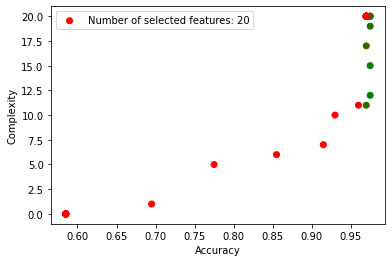

In [138]:
generate_tradeoff_plot(50,num_samples=1000, num_features=20, num_selected=20)